# Example Notebook demonstarting some basic functionality

### Working with legacy StatSTEMInput data

INFO:2025-07-08 18:23:53,043:jax._src.xla_bridge:752: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory


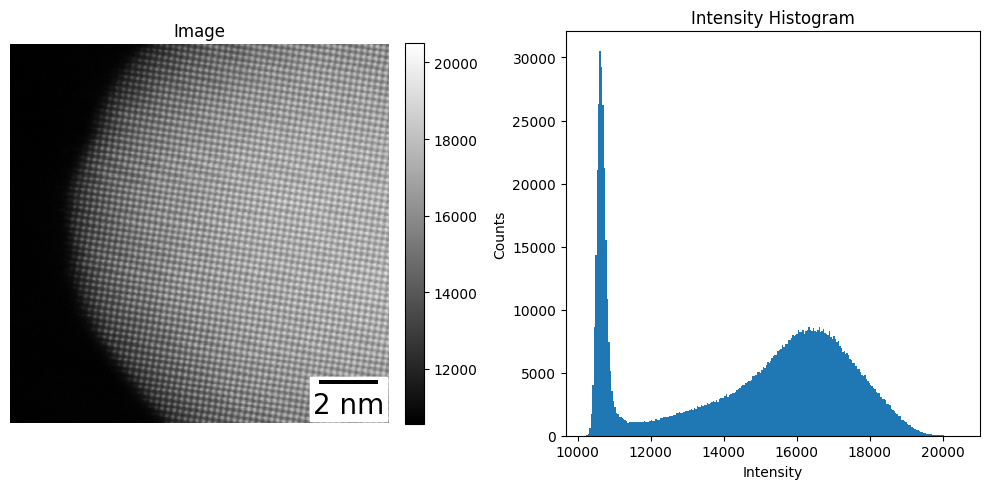

In [1]:
import matplotlib.pyplot as plt

import qem

legacyStatSTEM = qem.io.read_legacyInputStatSTEM('../data/Au/Example_Au.mat')
image = legacyStatSTEM['input']['obs']
dx = legacyStatSTEM['input']['dx']
inputStatSTEM = legacyStatSTEM['input']
outputStatSTEM = legacyStatSTEM['output']

input_coordinates = inputStatSTEM['coordinates']
output_coordinates = outputStatSTEM['coordinates']
input_coordinates[:,1] = input_coordinates[:,1]/dx
input_coordinates[:,0] = input_coordinates[:,0]/dx
from qem.image_fitting import ImageFitting

model=ImageFitting(image, dx=dx, elements=['Au'])
model.import_coordinates(input_coordinates)
model.plot()

In [2]:
model.fit_background = True
model.model_type = 'gaussian'
params = model.init_params()
# params = model.linear_estimator(params)
model.prediction = model.predict(params)
model.fit_global(params, maxiter=1000, tol =1e-3)
# model.fit_random_batch(params, maxiter=100, tol =1e-3,batch_size=6000)


2025-07-08 18:23:53.631458: W external/xla/xla/hlo/transforms/simplifiers/hlo_rematerialization.cc:3023] Can't reduce memory use below 941.97MiB (987726643 bytes) by rematerialization; only reduced to 11.52GiB (12369002496 bytes), down from 11.52GiB (12369002496 bytes) originally


{'pos_x': array([ 154.62868,  156.1095 ,  155.61667, ..., 1023.41833, 1021.55994,
         215.59811], shape=(2949,), dtype=float32),
 'pos_y': array([ 435.03043,  407.94827,  529.10876, ..., 1007.846  , 1021.4761 ,
         256.31534], shape=(2949,), dtype=float32),
 'height': array([1413.3077, 1641.5927, 1664.91  , ..., 6600.708 , 4833.9336,
        1690.7198], shape=(2949,), dtype=float32),
 'width': array([5.841609], dtype=float32),
 'background': array(10195.985, dtype=float32)}

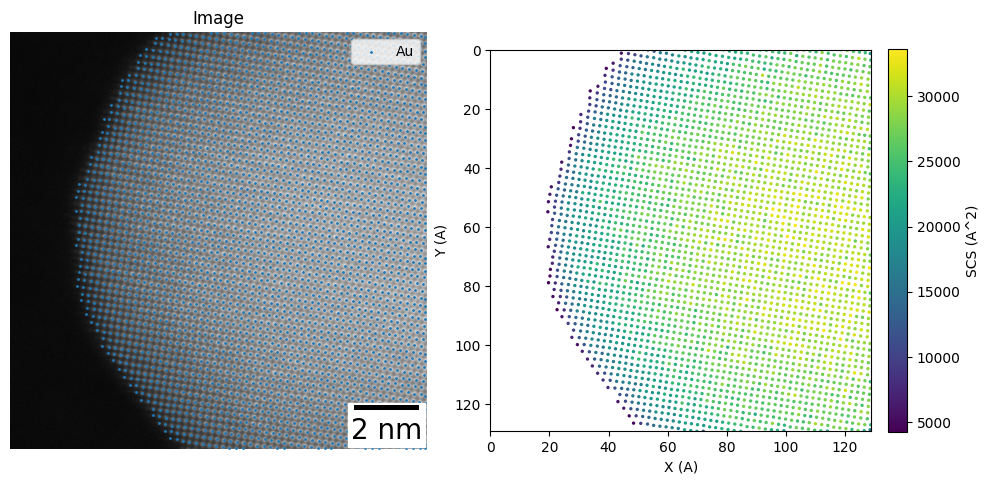

In [3]:
model.plot_scs()

Text(0.5, 1.0, 'Residuals')

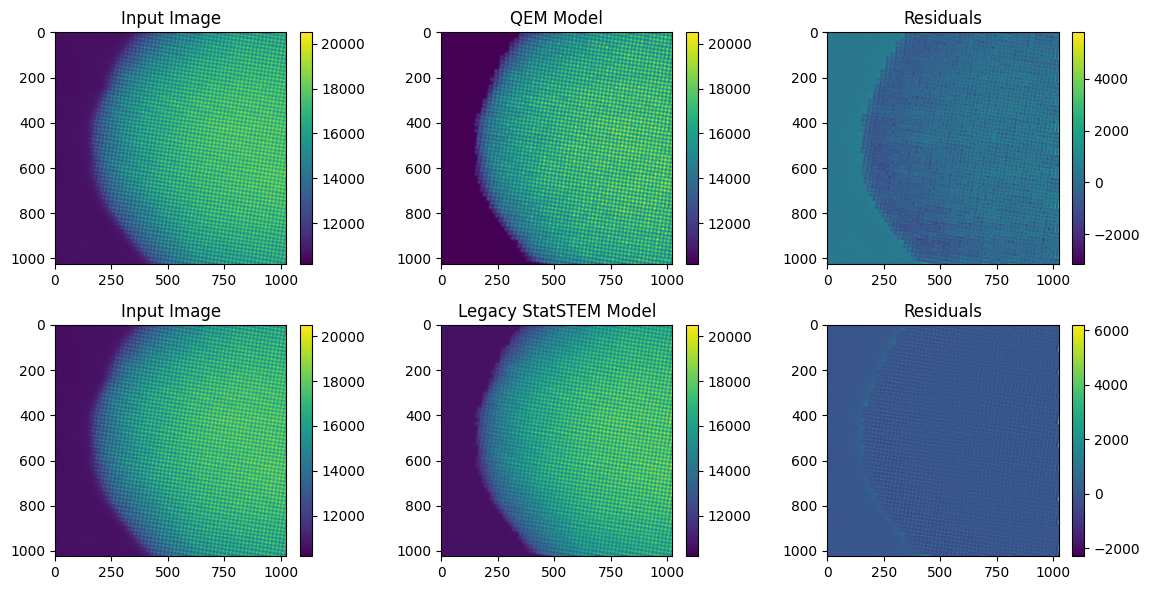

In [4]:
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
im=plt.imshow(model.image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Input Image')

plt.subplot(2,3,2)
im=plt.imshow(model.prediction)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(model.image.min(),model.image.max())
plt.tight_layout()
plt.title('QEM Model')

plt.subplot(2,3,3)
diff = model.image - model.prediction
im=plt.imshow(diff)
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim([-1000,1000])
plt.tight_layout()
plt.title('Residuals')

plt.subplot(2,3,4)
im=plt.imshow(image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Input Image')

plt.subplot(2,3,5)
im=plt.imshow(outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(model.image.min(),model.image.max())   
plt.tight_layout()
plt.title('Legacy StatSTEM Model')

plt.subplot(2,3,6)
im=plt.imshow(inputStatSTEM['obs']-outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim([-1000,1000])
plt.tight_layout()
plt.title('Residuals')